In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t

import sys
sys.path.append('faster-rcnn/')

from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

In [2]:
#change the directory
img = read_image('/home/shared/project/simple-faster-rcnn-pytorch/misc/demo.jpg')
img = t.from_numpy(img)[None]

In [3]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

You'll need to download pretrained model from [google dirve](https://drive.google.com/open?id=1cQ27LIn-Rig4-Uayzy_gH5-cW-NRGVzY) 
# 1. model converted from chainer

faster-rcnn/model/faster_rcnn.py:223: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = t.autograd.Variable(at.totensor(img).float()[None], volatile=True)


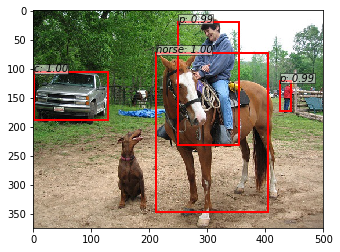

In [10]:
# in this machine the cupy isn't install correctly... 
# so it's a little slow
trainer.load('/home/shared/project/simple-faster-rcnn-pytorch/pretrain/pytorch_model.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 2. model trained with torchvision pretrained model

/home/shared/project/simple-faster-rcnn-pytorch/model/faster_rcnn.py:223: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = t.autograd.Variable(at.totensor(img).float()[None], volatile=True)


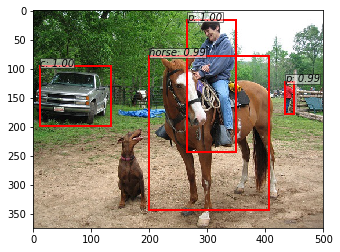

In [5]:
trainer.load('/home/shared/project/simple-faster-rcnn-pytorch/pretrain/torchvision_pretrain.pth')
opt.caffe_pretrain=False # this model was trained from torchvision-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 3. model trained with caffe pretrained model

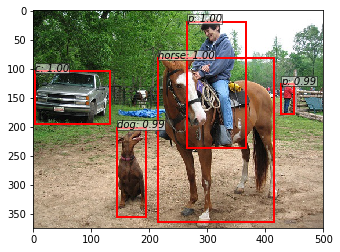

In [6]:
trainer.load('/home/cy/fasterrcnn_12222105_0.712649824453_caffe_pretrain.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

# Finetune

In [4]:
from train import train

torch_vision_dir = '/home/shared/project/simple-faster-rcnn-pytorch/pretrain/torchvision_pretrain.pth'
kwargs = {'load_path': torch_vision_dir}
train(**kwargs)

faster-rcnn/train.py:24: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/shared/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/shared/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/shared/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/shared/anacon

======user config========
{'caffe_pretrain': False,
 'caffe_pretrain_path': 'checkpoints/vgg16-caffe.pth',
 'data': 'voc',
 'debug_file': '/tmp/debugf',
 'env': 'faster-rcnn',
 'epoch': 14,
 'load_path': '/home/shared/project/simple-faster-rcnn-pytorch/pretrain/torchvision_pretrain.pth',
 'lr': 0.001,
 'lr_decay': 0.1,
 'max_size': 1000,
 'min_size': 600,
 'num_workers': 8,
 'plot_every': 40,
 'port': 8097,
 'pretrained_model': 'vgg16',
 'roi_sigma': 1.0,
 'rpn_sigma': 3.0,
 'test_num': 10000,
 'test_num_workers': 8,
 'use_adam': False,
 'use_chainer': False,
 'use_drop': False,
 'voc_data_dir': '/home/shared/project/simple-faster-rcnn-pytorch/data/VOC2007/VOCdevkit/VOC2007/',
 'weight_decay': 0.0005}
==========end============
load data
model construct completed
load pretrained model from /home/shared/project/simple-faster-rcnn-pytorch/pretrain/torchvision_pretrain.pth


39it [00:25,  1.52it/s]

Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------


Traceback (most recent call last):
  File "/home/shared/anaconda3/lib/python3.6/site-packages/visdom/__init__.py", line 388, in _send
    data=json.dumps(msg),
  File "/home/shared/anaconda3/lib/python3.6/json/__init__.py", line 231, in dumps
    return _default_encoder.encode(obj)
  File "/home/shared/anaconda3/lib/python3.6/json/encoder.py", line 199, in encode
    chunks = self.iterencode(o, _one_shot=True)
  File "/home/shared/anaconda3/lib/python3.6/json/encoder.py", line 257, in iterencode
    return _iterencode(o, 0)
  File "/home/shared/anaconda3/lib/python3.6/json/encoder.py", line 180, in default
    o.__class__.__name__)
TypeError: Object of type 'Tensor' is not JSON serializable
Traceback (most recent call last):
  File "/home/shared/anaconda3/lib/python3.6/site-packages/visdom/__init__.py", line 388, in _send
    data=json.dumps(msg),
  File "/home/shared/anaconda3/lib/python3.6/json/__init__.py", line 231, in dumps
    return _default_encoder.encode(obj)
  File "/home/sha

  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379,

Traceback (most recent call last):
  File "/home/shared/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-f41c6ee78613>", line 5, in <module>
    train(**kwargs)
  File "faster-rcnn/train.py", line 81, in train
    trainer.train_step(img, bbox, label, scale)
  File "faster-rcnn/trainer.py", line 171, in train_step
    self.update_meters(losses)
  File "faster-rcnn/trainer.py", line 222, in update_meters
    meter.add(loss_d[key])
  File "/home/shared/anaconda3/lib/python3.6/site-packages/torchnet/meter/averagevaluemeter.py", line 28, in add
    self.std = math.sqrt(self.m_s / (self.n - 1.0))
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/shared/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1828, in showtraceback
    stb = value._render_traceba

KeyboardInterrupt: 

KeyboardInterrupt
